In [144]:
from prophet import Prophet

In [146]:
import pandas as pd

In [148]:
import numpy as np

In [150]:
import matplotlib.pyplot as plt

In [152]:
import seaborn as sns

In [154]:
from prophet import Prophet

In [156]:
df = pd.read_csv("Reliance.csv") 

In [158]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
 7   MA_50      1134 non-null   float64       
 8   MA_200     834 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 86.8 KB


In [214]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
1228,False,False,False,False,False,False,False,False,False
1229,False,False,False,False,False,False,False,False,False
1230,False,False,False,False,False,False,False,False,False
1231,False,False,False,False,False,False,False,False,False


In [216]:
df.isnull().dropna()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
1228,False,False,False,False,False,False,False,False,False
1229,False,False,False,False,False,False,False,False,False
1230,False,False,False,False,False,False,False,False,False
1231,False,False,False,False,False,False,False,False,False


In [219]:
df.info

<bound method DataFrame.info of            Date         Open         High          Low        Close  \
0    2015-11-18   463.799988   465.649994   454.975006   456.000000   
1    2015-11-19   459.450012   469.350006   458.625000   467.375000   
2    2015-11-20   467.000000   476.399994   462.774994   473.424988   
3    2015-11-23   475.000000   478.950012   473.100006   476.875000   
4    2015-11-24   476.500000   485.799988   475.524994   483.850006   
...         ...          ...          ...          ...          ...   
1228 2020-11-10  2077.000000  2090.000000  2041.199951  2084.550049   
1229 2020-11-11  2089.000000  2095.000000  1978.099976  1997.199951   
1230 2020-11-12  1981.000000  2008.449951  1965.000000  1980.000000   
1231 2020-11-13  1982.000000  2036.650024  1981.750000  1996.400024   
1232 2020-11-17  2085.000000  2085.000000  1985.000000  1993.250000   

        Adj Close      Volume        MA_50       MA_200  
0      436.671021   5142766.0          NaN          NaN  

In [221]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
count,1233,1232.000000,1232.000000,1232.000000,1232.000000,1232.000000,1.232000e+03,1134.000000,834.000000
mean,2018-05-19 05:12:59.562043648,1036.035414,1048.479285,1023.015573,1035.164502,1024.471417,9.981743e+06,1007.865520,912.070651
min,2015-11-18 00:00:00,459.000000,465.649994,444.049988,453.274994,434.061554,1.283997e+06,484.837501,497.808126
25%,2017-02-16 00:00:00,551.925003,561.393768,546.000000,553.049988,540.720703,5.555522e+06,570.351629,596.243625
50%,2018-05-17 00:00:00,959.099976,972.474976,946.675018,960.949982,946.843903,7.560520e+06,933.299497,896.668186
75%,2019-08-20 00:00:00,1309.024963,1321.649963,1292.274963,1308.337494,1298.972321,1.140781e+07,1260.428253,1146.593750
max,2020-11-17 00:00:00,2325.000000,2369.350098,2310.550049,2324.550049,2324.550049,6.523004e+07,2185.085020,1730.760707
std,NaN,463.719976,469.906022,455.946191,462.301697,466.231636,7.603435e+06,434.236564,328.032330


In [223]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,NaN,NaN
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,NaN,NaN
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,NaN,NaN
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,NaN,NaN


In [225]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,2157.511006,1721.059958
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,2155.710005,1723.411708
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,2152.746006,1725.703957
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0,2150.432004,1728.153207
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0,2148.752004,1730.760707


In [227]:
df['Date'] = pd.to_datetime(df['Date'])

In [229]:
df = df.sort_values('Date')

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
 7   MA_50      1134 non-null   float64       
 8   MA_200     834 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 86.8 KB


In [233]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 0, 'Date')

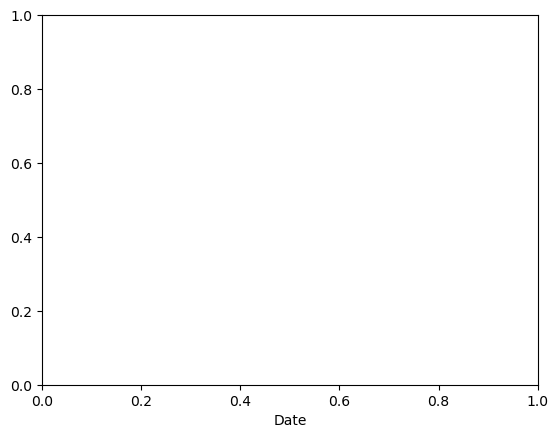

In [235]:
plt.xlabel("Date")

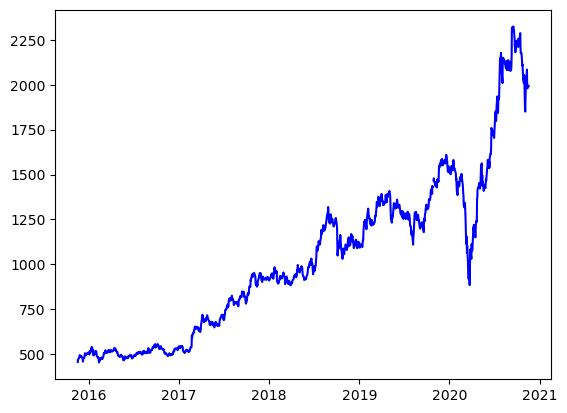

In [237]:
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')

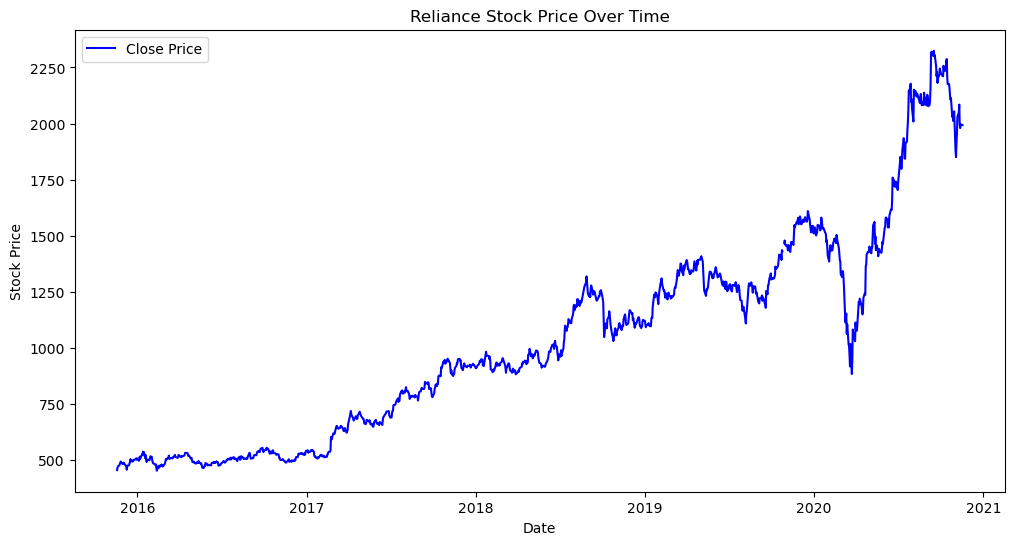

In [238]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Reliance Stock Price Over Time")
plt.legend()
plt.show()

In [240]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

In [243]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,NaN,NaN
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,NaN,NaN
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,NaN,NaN
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,NaN,NaN


In [245]:
df['MA_50'] = df['Close'].rolling(window=50).mean()

In [247]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,NaN,NaN
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,NaN,NaN
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,NaN,NaN
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,NaN,NaN


In [249]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,2157.511006,1721.059958
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,2155.710005,1723.411708
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,2152.746006,1725.703957
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0,2150.432004,1728.153207
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0,2148.752004,1730.760707


In [251]:
df["MA_200"] = df['Close'].rolling(window=200).mean()

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1233 non-null   datetime64[ns]
 1   Open       1232 non-null   float64       
 2   High       1232 non-null   float64       
 3   Low        1232 non-null   float64       
 4   Close      1232 non-null   float64       
 5   Adj Close  1232 non-null   float64       
 6   Volume     1232 non-null   float64       
 7   MA_50      1134 non-null   float64       
 8   MA_200     834 non-null    float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 86.8 KB


In [255]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,NaN,NaN
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,NaN,NaN
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,NaN,NaN
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,NaN,NaN
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,NaN,NaN


In [257]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA_50,MA_200
1228,2020-11-10,2077.0,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,2157.511006,1721.059958
1229,2020-11-11,2089.0,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,2155.710005,1723.411708
1230,2020-11-12,1981.0,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,2152.746006,1725.703957
1231,2020-11-13,1982.0,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0,2150.432004,1728.153207
1232,2020-11-17,2085.0,2085.000000,1985.000000,1993.250000,1993.250000,21479385.0,2148.752004,1730.760707


In [259]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

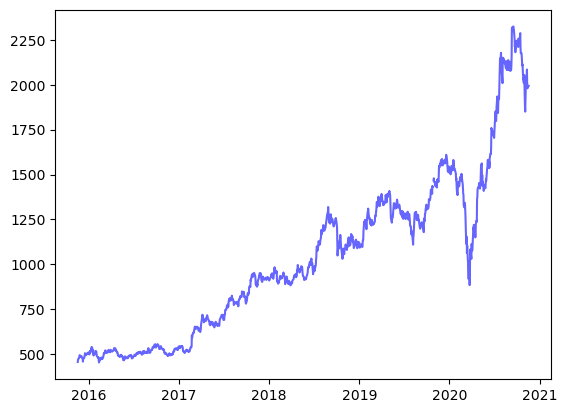

In [261]:
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6)

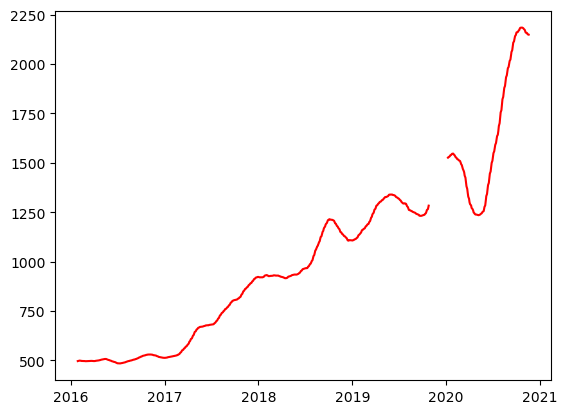

In [263]:
plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='red')

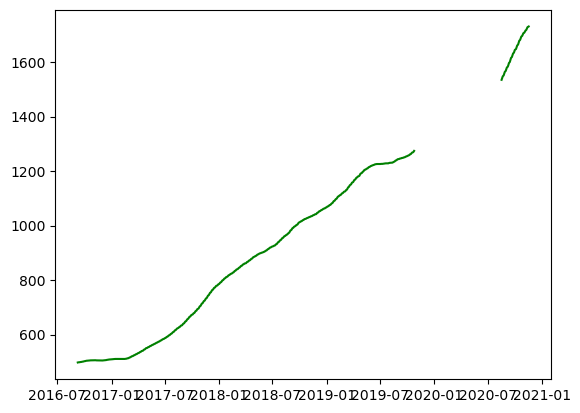

In [265]:
plt.plot(df['Date'], df['MA_200'], label='200-day MA', color='green')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


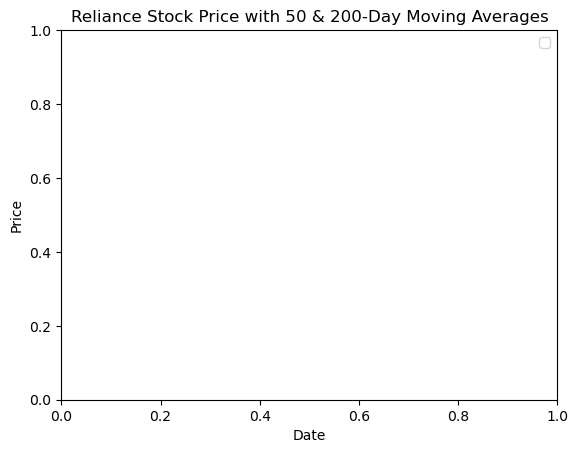

In [268]:
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Reliance Stock Price with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()

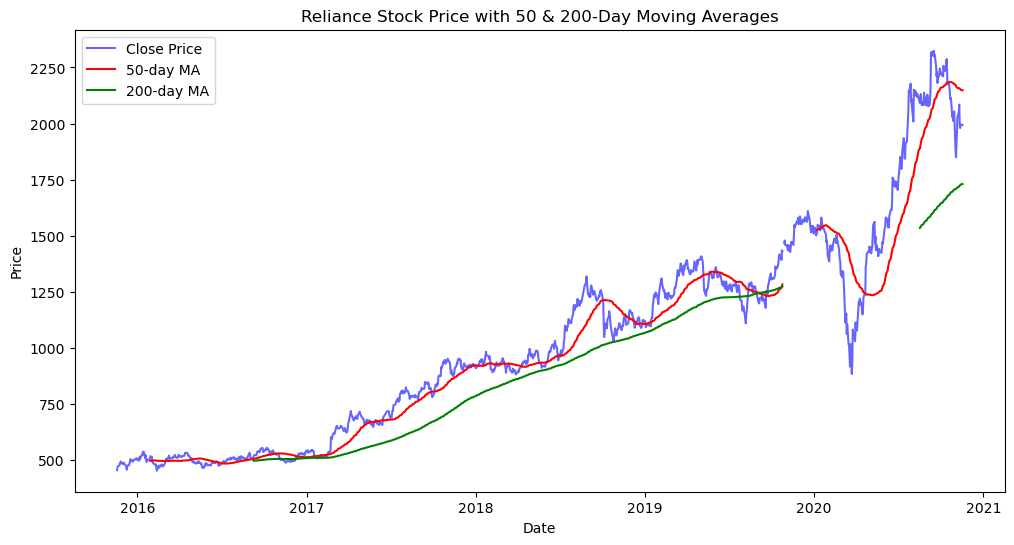

In [270]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6)

plt.plot(df['Date'], df['MA_50'], label='50-day MA', color='red')

plt.plot(df['Date'], df['MA_200'], label='200-day MA', color='green')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Reliance Stock Price with 50 & 200-Day Moving Averages")
plt.legend()
plt.show()


In [272]:
df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [274]:
model = Prophet()

In [276]:
model.fit(df_prophet)

10:12:14 - cmdstanpy - INFO - Chain [1] start processing
10:12:14 - cmdstanpy - INFO - Chain [1] done processing


In [278]:
future = model.make_future_dataframe(periods=365) 

In [280]:
forecast = model.predict(future)

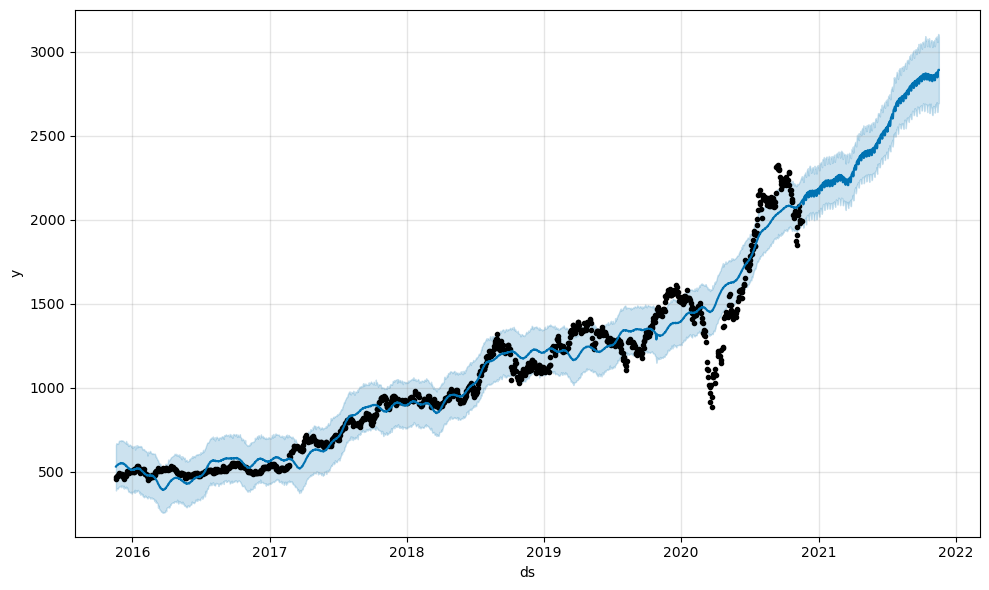

In [282]:
fig = model.plot(forecast)
plt.show()

In [286]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

In [288]:
df = pd.read_csv("Reliance.csv")   

df['Date'] = pd.to_datetime(df['Date'])

df_prophet = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

df_prophet.head()

,ds,y
0,2015-11-18,456.000000
1,2015-11-19,467.375000
2,2015-11-20,473.424988
3,2015-11-23,476.875000
4,2015-11-24,483.850006


In [290]:
model = Prophet()

model.fit(df_prophet)

10:16:06 - cmdstanpy - INFO - Chain [1] start processing
10:16:06 - cmdstanpy - INFO - Chain [1] done processing


In [292]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1593,2021-11-13,2847.637584,2637.107724,3064.653536
1594,2021-11-14,2850.957821,2650.250903,3058.126436
1595,2021-11-15,2887.195584,2688.636133,3111.206149
1596,2021-11-16,2893.581860,2672.400466,3095.131407
1597,2021-11-17,2893.367131,2697.664403,3095.550559


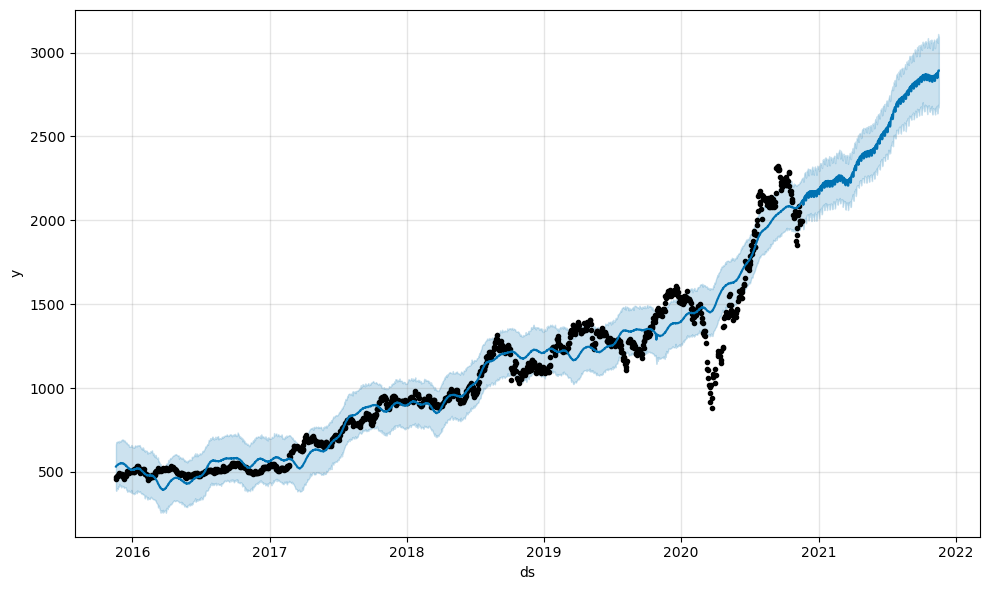

In [294]:
fig = model.plot(forecast)
plt.show()

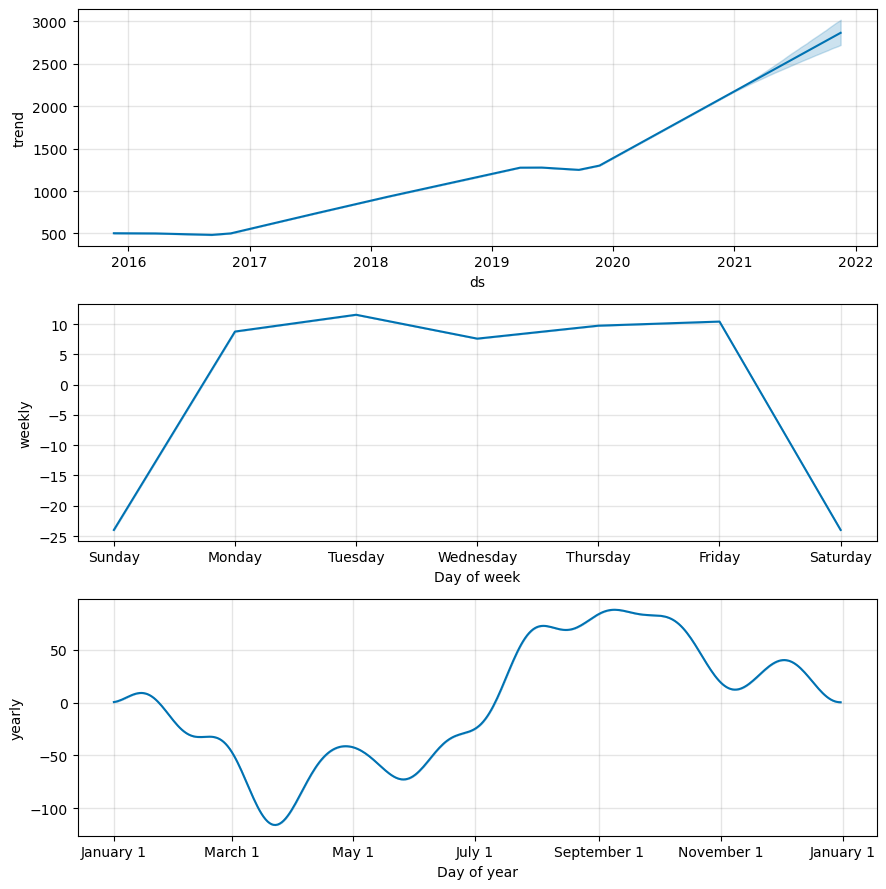

In [296]:
fig2 = model.plot_components(forecast)
plt.show()